In [2]:
import pandas as pd
import numpy as np
#from pandas.appes import CategoricalDtype
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
weight =  pd.read_excel('GumWeight_20240812_20240920.xlsx')
first_value = weight['Date'].iloc[0] # 获取第一个值
last_value = weight['Date'].iloc[-1] # 获取最后一个值
print(weight.columns)
print(f"第一个值: {first_value}, 最后一个值: {last_value}")
weight['Date'] = pd.to_datetime(weight['Date'], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True).dt.tz_localize(None)
weight.head(1)

Index(['ID', 'Date', 'Item_code', 'Item', 'length_or_thickness',
       'width_or_depth', 'Operator', 'Shift', 'length_or_thickness_std',
       'width_or_depth_std', 'Status', 'Load', 'entry_type', 'Target',
       'Actual'],
      dtype='object')
第一个值: 2024-08-12 00:02:15, 最后一个值: 2024-09-20 10:35:24


,ID,Date,Item_code,Item,length_or_thickness,width_or_depth,Operator,Shift,length_or_thickness_std,width_or_depth_std,Status,Load,entry_type,Target,Actual
0,647504,2024-08-12 00:02:15,557729,DMPE 绿箭原味薄荷,NaN,NaN,李荣辉,晚班,NaN,NaN,0,1,3,35.23,36.09


In [4]:
otdata =  pd.read_csv('transformed_sorted_file.csv')
first_value = otdata['TS'].iloc[0] # 获取第一个值
last_value = otdata['TS'].iloc[-1] # 获取最后一个值
print(otdata.columns)
print(f"第一个值: {first_value}, 最后一个值: {last_value}")
otdata.head(1)

Index(['TS', 'CG STI.CG STI.LoafGum.LoafGum01MaxTemp',
       'CG STI.CG STI.LoafGum.LoafGum01MinTemp',
       'CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rChillerSetpoint',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum1InletTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum1OutletTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum2InletTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum2OutletTemp',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumExitTempLeft',
       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumExitTempRight',
       'CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM',
       'CG_Sheeting.CG_Sheeting.dbHMI.Sheeting.SRV_Gap1stSizing.rActualPosition_inches',
       'CG_Sheeting.CG_Sheeting.dbHMI.Sheeting.SRV_

,TS,CG STI.CG STI.LoafGum.LoafGum01MaxTemp,CG STI.CG STI.LoafGum.LoafGum01MinTemp,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rChillerSetpoint,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum1InletTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum1OutletTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum2InletTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rDrum2OutletTemp,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,...,CG_Sheeting.CG_Sheeting.dbHMI.Sheeting.SRV_Gap3rdSizing.rActualPosition_inches,CG_Sheeting.CG_Sheeting.dbHMI.Sheeting.SRV_GapFinalSizing.rActualPosition_inches,CG_Sheeting.CG_Sheeting.dbHMI.Variables.rSheetsPerMinuteSetpoint,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_LB_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_PH_Temp_SP,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_UB_Temp_RealValue,SFBMix.PLC_BOSCH EXTRUDER.DB_Data_Exchange.EXT_UB_Temp_SP,SFBMix.plcSFBMix.dbAdditionalParameter.StateFromSheeting.bMachineRunning
0,2024-08-22 19:43:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.061279,NaN,40.33,40.0,49.67,50.0,40.27,40.0,True


In [8]:
Temp_list = ['TS',
             'CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp', # 挤压机出口胶温度
             'CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM', #横刀速度
             'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature' # 冷辊入口胶温度
            ] 

Temp_df = otdata[Temp_list]
Temp_df['TS'] = pd.to_datetime(Temp_df['TS'], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True).dt.tz_localize(None)
Temp_df['Day'] = Temp_df['TS'].dt.date

# 去除缺失值
Temp_df_nona = Temp_df.dropna()

/var/folders/xc/vyhdp_0d2ws5542x0phtr2240000gn/T/ipykernel_64780/2783713583.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_df['TS'] = pd.to_datetime(Temp_df['TS'], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True).dt.tz_localize(None)
/var/folders/xc/vyhdp_0d2ws5542x0phtr2240000gn/T/ipykernel_64780/2783713583.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_df['Day'] = Temp_df['TS'].dt.date


1. 在19天的数据中，找到每天每个香型的生产时间和停机次数。这样，我们得到了每天每个香型的平均停机间隔。

 2. 只区分有糖和无糖。在1的数据中，选择有糖香型平均停机间隔最长（a.k.a. 生产最稳定）的日期，找top 5。对于无糖香型，做同样的事情。
 
 3. 对于2中有糖香型，把这最稳定的5天的所有挤压机出口温度从低到高排列。我们找到20% percentile和80% percentile。我们认为，生成最稳的天数中，温度比较中间的区域，是较好的温度。对于无糖香型，做同样的事情
 
 4. 这个温度的上下限，就是触发我们去调整的threshold。例如，threshold为43 - 51度。那么，当挤压机出口温度降至43度时，我们提升夹套水的温度，以使得挤压机出口温度上升。当挤压机出口温度升至51度时，我们降低夹套水的温度，以使得挤压机出口温度下降。
 

# 00 开停机处理 & mapping

In [9]:
# 定义正常生产
def is_producing(row):
    # 判断是否满足生产条件
    if (row['CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp'] >= 40 and 
        row['CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature'] >= 32 and 
        row['CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM'] > 100):
        return 'produce' # 生产
    else:
        return 'off' # 停机

# 应用筛选条件，新增'是否生产中'列
Temp_df_nona['offperiod'] = Temp_df_nona.apply(is_producing, axis=1)

# 显示数据框
Temp_df_nona

/var/folders/xc/vyhdp_0d2ws5542x0phtr2240000gn/T/ipykernel_64780/665107336.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_df_nona['offperiod'] = Temp_df_nona.apply(is_producing, axis=1)


,TS,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,Day,offperiod
1,2024-08-22 19:43:45,47.685184,209.85533,38.874420,2024-08-22,produce
2,2024-08-22 19:43:46,47.534720,210.05829,38.686344,2024-08-22,produce
4,2024-08-22 19:43:48,47.696760,209.85817,38.874420,2024-08-22,produce
5,2024-08-22 19:43:49,47.569447,209.76312,38.686344,2024-08-22,produce
7,2024-08-22 19:43:51,47.685184,210.02985,38.874420,2024-08-22,produce
...,...,...,...,...,...,...
1610717,2024-09-20 10:10:25,47.164350,209.95784,38.577835,2024-09-20,produce
1610718,2024-09-20 10:10:26,47.210650,210.05536,38.585070,2024-09-20,produce
1610719,2024-09-20 10:10:27,47.210650,209.93654,38.483795,2024-09-20,produce
1610720,2024-09-20 10:10:28,47.245370,210.02222,38.483795,2024-09-20,produce


In [11]:
# 根据offperiod 分别计算对应的TS数量
Temp_df_nona.groupby('offperiod')['TS'].count()

offperiod
off        303617
produce    723928
Name: TS, dtype: int64

In [12]:
weight_column_required = [
    'Date',
    'Item',
    'Load',
    'entry_type',
    'Actual'
]

weight_clean = weight[weight_column_required]
weight_clean['Date'] = pd.to_datetime(weight_clean['Date'], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True).dt.tz_localize(None)
# 根据Item的首字母判断是否含有糖
weight_clean['Sugar'] = np.where(weight_clean['Item'].str[0].isin(['D', 'W', 'R']), 'Y', 'N')
print(weight_clean.groupby('Sugar')['Date'].count())
weight_clean

Sugar
N    5152
Y    6306
Name: Date, dtype: int64


/var/folders/xc/vyhdp_0d2ws5542x0phtr2240000gn/T/ipykernel_64780/591205926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_clean['Date'] = pd.to_datetime(weight_clean['Date'], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True).dt.tz_localize(None)
/var/folders/xc/vyhdp_0d2ws5542x0phtr2240000gn/T/ipykernel_64780/591205926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_clean['Sugar'] = np.where(weight_clean['Item'].str[0].isin(['D', 'W', 'R']), 'Y', 'N')


,Date,Item,Load,entry_type,Actual,Sugar
0,2024-08-12 00:02:15,DMPE 绿箭原味薄荷,1,3,36.09,Y
1,2024-08-12 00:02:19,DMPE 绿箭原味薄荷,1,3,36.20,Y
2,2024-08-12 00:03:00,DMPE 绿箭原味薄荷,1,2,NaN,Y
3,2024-08-12 00:03:19,DMPE 绿箭原味薄荷,1,1,NaN,Y
4,2024-08-12 00:51:19,DMPE 绿箭原味薄荷,1,3,35.42,Y
...,...,...,...,...,...,...
11453,2024-09-20 10:30:05,DMPE 绿箭原味薄荷,334,1,NaN,Y
11454,2024-09-20 10:34:22,DMPE 绿箭原味薄荷,340,3,35.17,Y
11455,2024-09-20 10:34:24,DMPE 绿箭原味薄荷,340,3,35.35,Y
11456,2024-09-20 10:34:56,DMPE 绿箭原味薄荷,340,2,NaN,Y


In [13]:
# 确保 'TS' 和 'Date' 都是 datetime 类型
Temp_df_nona['TS'] = pd.to_datetime(Temp_df_nona['TS'])
weight_clean['Date'] = pd.to_datetime(weight_clean['Date'])

# Step 1: 删除 weight_clean 中早于 Temp_df_nona 第一个时间戳的数据
first_ts = Temp_df_nona['TS'].min()
weight_clean = weight_clean[weight_clean['Date'] >= '2024-08-22 12:00:00']

# 根据 weight_clean 中 'Date' 列的最小值和最大值，生成一个以秒为单位的完整时间序列
full_time_range = pd.date_range(start=weight_clean['Date'].min(), 
                                end=weight_clean['Date'].max(), 
                                freq='S')  # freq='S' 代表以秒为单位

# Step 2: 将 weight_clean 的 'Date' 列重新索引到完整的时间序列上
weight_clean_full = weight_clean.set_index('Date').reindex(full_time_range)

# Step 3: 使用 ffill 填充缺失值
weight_clean_full.fillna(method='ffill', inplace=True)

# 将索引 'Date' 变回列
weight_clean_full.reset_index(inplace=True)
weight_clean_full.rename(columns={'index': 'Date'}, inplace=True)

# 显示填充后的 weight_clean_full
weight_clean_full

/var/folders/xc/vyhdp_0d2ws5542x0phtr2240000gn/T/ipykernel_64780/3548896208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_df_nona['TS'] = pd.to_datetime(Temp_df_nona['TS'])
/var/folders/xc/vyhdp_0d2ws5542x0phtr2240000gn/T/ipykernel_64780/3548896208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_clean['Date'] = pd.to_datetime(weight_clean['Date'])


,Date,Item,Load,entry_type,Actual,Sugar
0,2024-08-22 12:04:36,DMRC（绿箭樱花薄荷）,21.0,3.0,35.24,Y
1,2024-08-22 12:04:37,DMRC（绿箭樱花薄荷）,21.0,3.0,35.24,Y
2,2024-08-22 12:04:38,DMRC（绿箭樱花薄荷）,21.0,3.0,35.24,Y
3,2024-08-22 12:04:39,DMRC（绿箭樱花薄荷）,21.0,3.0,35.24,Y
4,2024-08-22 12:04:40,DMRC（绿箭樱花薄荷）,21.0,3.0,35.24,Y
...,...,...,...,...,...,...
2500244,2024-09-20 10:35:20,DMPE 绿箭原味薄荷,340.0,2.0,35.35,Y
2500245,2024-09-20 10:35:21,DMPE 绿箭原味薄荷,340.0,2.0,35.35,Y
2500246,2024-09-20 10:35:22,DMPE 绿箭原味薄荷,340.0,2.0,35.35,Y
2500247,2024-09-20 10:35:23,DMPE 绿箭原味薄荷,340.0,2.0,35.35,Y


In [14]:
# Perform merge using 'TS' from Temp_df_nona and 'Date' from weight_clean
join_result = pd.merge(
    Temp_df_nona, 
    weight_clean_full, 
    left_on=['TS'],  
    right_on=['Date'],  
    how='left' 
)

# Display the join result
join_result

,TS,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,Day,offperiod,Date,Item,Load,entry_type,Actual,Sugar
0,2024-08-22 19:43:45,47.685184,209.85533,38.874420,2024-08-22,produce,2024-08-22 19:43:45,DMRR（真叶玫瑰薄荷）,172.0,1.0,35.47,Y
1,2024-08-22 19:43:46,47.534720,210.05829,38.686344,2024-08-22,produce,2024-08-22 19:43:46,DMRR（真叶玫瑰薄荷）,172.0,1.0,35.47,Y
2,2024-08-22 19:43:48,47.696760,209.85817,38.874420,2024-08-22,produce,2024-08-22 19:43:48,DMRR（真叶玫瑰薄荷）,172.0,1.0,35.47,Y
3,2024-08-22 19:43:49,47.569447,209.76312,38.686344,2024-08-22,produce,2024-08-22 19:43:49,DMRR（真叶玫瑰薄荷）,172.0,1.0,35.47,Y
4,2024-08-22 19:43:51,47.685184,210.02985,38.874420,2024-08-22,produce,2024-08-22 19:43:51,DMRR（真叶玫瑰薄荷）,172.0,1.0,35.47,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1027540,2024-09-20 10:10:25,47.164350,209.95784,38.577835,2024-09-20,produce,2024-09-20 10:10:25,DMPE 绿箭原味薄荷,324.0,1.0,35.27,Y
1027541,2024-09-20 10:10:26,47.210650,210.05536,38.585070,2024-09-20,produce,2024-09-20 10:10:26,DMPE 绿箭原味薄荷,324.0,1.0,35.27,Y
1027542,2024-09-20 10:10:27,47.210650,209.93654,38.483795,2024-09-20,produce,2024-09-20 10:10:27,DMPE 绿箭原味薄荷,324.0,1.0,35.27,Y
1027543,2024-09-20 10:10:28,47.245370,210.02222,38.483795,2024-09-20,produce,2024-09-20 10:10:28,DMPE 绿箭原味薄荷,324.0,1.0,35.27,Y


在19天的数据中，找到每天每个香型的生产时间和停机次数。这样，我们得到了每天每个香型的平均停机间隔。

只区分有糖和无糖。在1的数据中，选择有糖香型平均停机间隔最长（a.k.a. 生产最稳定）的日期，找top 5。对于无糖香型，做同样的事情。

对于2中有糖香型，把这最稳定的5天的所有挤压机出口温度从低到高排列。我们找到20% percentile和80% percentile。我们认为，生成最稳的天数中，温度比较中间的区域，是较好的温度。对于无糖香型，做同样的事情

这个温度的上下限，就是触发我们去调整的threshold。例如，threshold为43 - 51度。那么，当挤压机出口温度降至43度时，我们提升夹套水的温度，以使得挤压机出口温度上升。当挤压机出口温度升至51度时，我们降低夹套水的温度，以使得挤压机出口温度下降。

## 01 找到每天每个香型的生产时间和停机次数。这样，我们得到了每天每个香型的平均停机间隔

In [71]:
# join_result：['TS', 'CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp',
#       'CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM',
#       'CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature',
#       'Day', 'offperiod', 'Date', 'Item', 'Load', 'entry_type', 'Actual',
#       'Sugar']
# 根据'Sugar' 来定义这个flavor（‘item'）是有糖还是无糖
# 定义每个flavor（‘item'）的offperiod = 'produce'就是生产状态， offperiod='off'就是停机状态
# 我需要：有糖无糖，每个类型每一天（'Day'）的生产时间、停机间隔时间
# 生产时间：produce的第一个ts，一直到转换为off之前的最后一个时间点；这两个时间点中的time difference就是生产时间
# 停机间隔时间：off的第一个ts，一直到转换为produce之前的最后一个时间点；这两个时间点中的time difference就是停机时间
# 给我两个csv
# 一个是生产时间csv： 每一段生产的第一个ts、转换为off之前的最后一个时间点、生产持续时间、sugar（有糖无糖）、item(每个flavor)
# 一个是停机间隔时间csv： 每一段off的第一个ts、转换为produce之前的最后一个时间点、停机间隔时间、sugar（有糖无糖）、item(每个flavor)

In [213]:
import pandas as pd

# 假设 join_result 已经是最终的合并表格
# 确保 'TS' 和 'Day' 是 datetime 类型
join_result['TS'] = pd.to_datetime(join_result['TS'])
join_result['Day'] = pd.to_datetime(join_result['Day']).dt.date  # 保留日期部分

# Step 1: 初始化空的列表来存储每个时间段的数据
produce_data = []
off_data = []

# Step 2: 遍历数据，按 item 和 Day 分组，然后计算每段生产和停机时间
for (item, day), group in join_result.groupby(['Item', 'Day']):
    # 按时间排序
    group = group.sort_values('TS')
    
    current_state = None
    start_ts = None
    
    for i, row in group.iterrows():
        # 如果当前状态是生产状态
        if row['offperiod'] == 'produce':
            if current_state != 'produce':
                if current_state == 'off' and start_ts is not None:
                    # 如果之前是停机状态，计算停机时间段并记录
                    off_data.append({
                        'start_ts': start_ts,
                        'end_ts': prev_ts,
                        'off_duration': prev_ts - start_ts,
                        'sugar': prev_row['Sugar'],  # 直接使用Sugar列
                        'item': prev_row['Item'],
                        'day': prev_row['Day']
                    })
                # 切换到生产状态，记录生产的开始时间
                current_state = 'produce'
                start_ts = row['TS']
        # 如果当前状态是停机状态
        elif row['offperiod'] == 'off':
            if current_state != 'off':
                if current_state == 'produce' and start_ts is not None:
                    # 如果之前是生产状态，计算生产时间段并记录
                    produce_data.append({
                        'start_ts': start_ts,
                        'end_ts': prev_ts,
                        'produce_duration': prev_ts - start_ts,
                        'sugar': prev_row['Sugar'],  # 直接使用Sugar列
                        'item': prev_row['Item'],
                        'day': prev_row['Day']
                    })
                # 切换到停机状态，记录停机的开始时间
                current_state = 'off'
                start_ts = row['TS']
        prev_ts = row['TS']
        prev_row = row

    # 处理每个 group 的最后一段时间
    if current_state == 'produce' and start_ts is not None:
        produce_data.append({
            'start_ts': start_ts,
            'end_ts': prev_ts,
            'produce_duration': prev_ts - start_ts,
            'sugar': prev_row['Sugar'],  # 直接使用Sugar列
            'item': prev_row['Item'],
            'day': prev_row['Day']
        })
    elif current_state == 'off' and start_ts is not None:
        off_data.append({
            'start_ts': start_ts,
            'end_ts': prev_ts,
            'off_duration': prev_ts - start_ts,
            'sugar': prev_row['Sugar'],  # 直接使用Sugar列
            'item': prev_row['Item'],
            'day': prev_row['Day']
        })

# Step 3: 创建生产和停机数据的 DataFrame
produce_df = pd.DataFrame(produce_data)
off_df = pd.DataFrame(off_data)

# Step 4: 输出为 CSV 文件
produce_df.to_csv('produce_time.csv', index=False)
off_df.to_csv('off_time.csv', index=False)

# 显示两个 DataFrame
produce_df, off_df


(               start_ts              end_ts produce_duration      sugar  \
 0   2024-09-13 07:13:45 2024-09-13 07:27:51  0 days 00:14:06  Sugarfree   
 1   2024-09-13 07:32:54 2024-09-13 07:37:29  0 days 00:04:35  Sugarfree   
 2   2024-09-13 08:22:58 2024-09-13 09:24:00  0 days 01:01:02  Sugarfree   
 3   2024-09-16 07:20:09 2024-09-16 08:32:59  0 days 01:12:50      Sugar   
 4   2024-09-16 10:09:04 2024-09-16 10:12:15  0 days 00:03:11      Sugar   
 ..                  ...                 ...              ...        ...   
 373 2024-09-03 12:13:06 2024-09-03 12:13:33  0 days 00:00:27      Sugar   
 374 2024-09-03 12:17:17 2024-09-03 12:24:53  0 days 00:07:36      Sugar   
 375 2024-09-03 12:49:16 2024-09-03 13:02:20  0 days 00:13:04      Sugar   
 376 2024-09-03 13:11:54 2024-09-03 13:45:26  0 days 00:33:32      Sugar   
 377 2024-09-03 14:04:31 2024-09-03 14:15:07  0 days 00:10:36      Sugar   
 
                   item         day  
 0    AUWM（澳洲FIVE奔涌西瓜味）  2024-09-13  
 1    AUWM

In [214]:
off_df.rename(columns={'off_duration': 'duration'}, inplace=True)
produce_df.rename(columns={'produce_duration': 'duration'}, inplace=True)

In [215]:
import pandas as pd

# 假设 produce_df 和 off_df 已经生成
# Step 1: 在 produce_df 中添加 'tag' 列，标记为 'produce'
produce_df['tag'] = 'produce'

# Step 2: 在 off_df 中添加 'tag' 列，标记为 'off'
off_df['tag'] = 'off'

# Step 3: 使用 pd.concat() 合并两个 DataFrame
combined_df = pd.concat([produce_df, off_df], ignore_index=True)

# Step 4: 根据开始时间 'start_ts' 排序，确保按时间顺序排列
combined_df = combined_df.sort_values(by='start_ts').reset_index(drop=True)

# 显示合并后的结果
combined_df.to_csv('combined_time.csv', index=False)
combined_df

,start_ts,end_ts,duration,sugar,item,day,tag
0,2024-08-22 19:43:45,2024-08-22 20:16:27,0 days 00:32:42,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-22,produce
1,2024-08-22 20:16:28,2024-08-22 23:59:58,0 days 03:43:30,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-22,off
2,2024-08-23 00:00:01,2024-08-23 00:01:20,0 days 00:01:19,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,off
3,2024-08-23 00:01:21,2024-08-23 08:43:43,0 days 08:42:22,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,produce
4,2024-08-23 08:43:46,2024-08-23 08:48:58,0 days 00:05:12,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,off
...,...,...,...,...,...,...,...
717,2024-09-19 20:06:53,2024-09-19 23:54:36,0 days 03:47:43,Sugar,DMPE 绿箭原味薄荷,2024-09-19,off
718,2024-09-19 23:54:37,2024-09-19 23:59:59,0 days 00:05:22,Sugar,DMPE 绿箭原味薄荷,2024-09-19,produce
719,2024-09-20 00:00:00,2024-09-20 08:29:09,0 days 08:29:09,Sugar,DMPE 绿箭原味薄荷,2024-09-20,produce
720,2024-09-20 08:29:10,2024-09-20 08:41:38,0 days 00:12:28,Sugar,DMPE 绿箭原味薄荷,2024-09-20,off


In [216]:
# 绘制时间序列图，使用 scatter 图表示 1 和 0
plt.figure(figsize=(10, 6))

# 绘制生产状态 (tag_numeric = 1) 的 scatter 图
plt.scatter(combined_df['start_ts'][combined_df['tag_numeric'] == 1], 
            combined_df['tag_numeric'][combined_df['tag_numeric'] == 1], 
            label='Produce', color='green', s=100)

# 绘制停机状态 (tag_numeric = 0) 的 scatter 图
plt.scatter(combined_df['start_ts'][combined_df['tag_numeric'] == 0], 
            combined_df['tag_numeric'][combined_df['tag_numeric'] == 0], 
            label='Off', color='red', s=100)

# Step 3: 设置图形属性
plt.xlabel('Time')
plt.ylabel('Status (1 = produce, 0 = off)')
plt.title('Production and Off Periods Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Step 4: 显示图形
plt.tight_layout()
plt.show()


KeyError: 'tag_numeric'

<Figure size 1000x600 with 0 Axes>

In [217]:
combined_df = pd.read_csv('combined_time.csv')
combined_df

,start_ts,end_ts,duration,sugar,item,day,tag
0,2024-08-22 19:43:45,2024-08-22 20:16:27,0 days 00:32:42,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-22,produce
1,2024-08-22 20:16:28,2024-08-22 23:59:58,0 days 03:43:30,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-22,off
2,2024-08-23 00:00:01,2024-08-23 00:01:20,0 days 00:01:19,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,off
3,2024-08-23 00:01:21,2024-08-23 08:43:43,0 days 08:42:22,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,produce
4,2024-08-23 08:43:46,2024-08-23 08:48:58,0 days 00:05:12,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,off
...,...,...,...,...,...,...,...
717,2024-09-19 20:06:53,2024-09-19 23:54:36,0 days 03:47:43,Sugar,DMPE 绿箭原味薄荷,2024-09-19,off
718,2024-09-19 23:54:37,2024-09-19 23:59:59,0 days 00:05:22,Sugar,DMPE 绿箭原味薄荷,2024-09-19,produce
719,2024-09-20 00:00:00,2024-09-20 08:29:09,0 days 08:29:09,Sugar,DMPE 绿箭原味薄荷,2024-09-20,produce
720,2024-09-20 08:29:10,2024-09-20 08:41:38,0 days 00:12:28,Sugar,DMPE 绿箭原味薄荷,2024-09-20,off


In [218]:
# Step 1: Convert the 'duration' column to timedelta
combined_df['duration'] = pd.to_timedelta(combined_df['duration'], errors='coerce')

# Step 2: Convert timedelta to minutes by applying total_seconds() / 60
combined_df['duration_min'] = combined_df['duration'].apply(lambda x: x.total_seconds() / 60 if pd.notnull(x) else 0)

# Display the DataFrame to verify the result
combined_df


,start_ts,end_ts,duration,sugar,item,day,tag,duration_min
0,2024-08-22 19:43:45,2024-08-22 20:16:27,0 days 00:32:42,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-22,produce,32.700000
1,2024-08-22 20:16:28,2024-08-22 23:59:58,0 days 03:43:30,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-22,off,223.500000
2,2024-08-23 00:00:01,2024-08-23 00:01:20,0 days 00:01:19,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,off,1.316667
3,2024-08-23 00:01:21,2024-08-23 08:43:43,0 days 08:42:22,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,produce,522.366667
4,2024-08-23 08:43:46,2024-08-23 08:48:58,0 days 00:05:12,Sugar,DMRR（真叶玫瑰薄荷）,2024-08-23,off,5.200000
...,...,...,...,...,...,...,...,...
717,2024-09-19 20:06:53,2024-09-19 23:54:36,0 days 03:47:43,Sugar,DMPE 绿箭原味薄荷,2024-09-19,off,227.716667
718,2024-09-19 23:54:37,2024-09-19 23:59:59,0 days 00:05:22,Sugar,DMPE 绿箭原味薄荷,2024-09-19,produce,5.366667
719,2024-09-20 00:00:00,2024-09-20 08:29:09,0 days 08:29:09,Sugar,DMPE 绿箭原味薄荷,2024-09-20,produce,509.150000
720,2024-09-20 08:29:10,2024-09-20 08:41:38,0 days 00:12:28,Sugar,DMPE 绿箭原味薄荷,2024-09-20,off,12.466667


In [219]:
final_df = combined_df.groupby(['tag','sugar','item','day'])['duration_min'].mean().reset_index()
final_df = final_df.sort_values(by=['tag','sugar', 'item', 'day'])
final_df.head(50)

,tag,sugar,item,day,duration_min
0,off,Sugar,DMLM（绿箭青柠薄荷）,2024-09-16,96.033333
1,off,Sugar,DMPE 绿箭原味薄荷,2024-08-29,3.750000
2,off,Sugar,DMPE 绿箭原味薄荷,2024-08-30,15.922222
3,off,Sugar,DMPE 绿箭原味薄荷,2024-08-31,22.322917
4,off,Sugar,DMPE 绿箭原味薄荷,2024-09-03,48.841667
5,off,Sugar,DMPE 绿箭原味薄荷,2024-09-09,7.926515
6,off,Sugar,DMPE 绿箭原味薄荷,2024-09-10,16.798485
7,off,Sugar,DMPE 绿箭原味薄荷,2024-09-11,15.133333
8,off,Sugar,DMPE 绿箭原味薄荷,2024-09-15,204.466667
9,off,Sugar,DMPE 绿箭原味薄荷,2024-09-16,15.833333


In [220]:
final_df[final_df['tag'] == 'produce']

,tag,sugar,item,day,duration_min
55,produce,Sugar,DMLM（绿箭青柠薄荷）,2024-09-16,38.008333
56,produce,Sugar,DMPE 绿箭原味薄荷,2024-08-29,62.064286
57,produce,Sugar,DMPE 绿箭原味薄荷,2024-08-30,348.029167
58,produce,Sugar,DMPE 绿箭原味薄荷,2024-08-31,13.053704
59,produce,Sugar,DMPE 绿箭原味薄荷,2024-09-03,69.983333
60,produce,Sugar,DMPE 绿箭原味薄荷,2024-09-09,40.246970
61,produce,Sugar,DMPE 绿箭原味薄荷,2024-09-10,84.831818
62,produce,Sugar,DMPE 绿箭原味薄荷,2024-09-11,3.905556
63,produce,Sugar,DMPE 绿箭原味薄荷,2024-09-15,86.216667
64,produce,Sugar,DMPE 绿箭原味薄荷,2024-09-16,98.120833


In [221]:
print(final_df['day'].nunique())
print(final_df['day'].unique())
# 总共纳入计算23天,OT数据从8/22开始

23
['2024-09-16' '2024-08-29' '2024-08-30' '2024-08-31' '2024-09-03'
 '2024-09-09' '2024-09-10' '2024-09-11' '2024-09-15' '2024-09-18'
 '2024-09-19' '2024-09-20' '2024-08-22' '2024-08-23' '2024-08-24'
 '2024-08-25' '2024-08-26' '2024-08-28' '2024-09-01' '2024-09-13'
 '2024-09-14' '2024-08-27' '2024-09-12']


In [222]:
# 找到每天每个香型的生产时间和停机次数。这样，我们得到了每天每个香型的平均停机间隔
# 有糖无糖、每个香型生产的天数、全部生产时间、平均每天的生产时间、全部停机次数、平均每天的停机次数、全部停机时间、平均每天的停机时间
# Step 1: 过滤出生产状态 ('produce') 和停机状态 ('off')
produce_df = combined_df[combined_df['tag'] == 'produce']
off_df = combined_df[combined_df['tag'] == 'off']

# Step 2: 计算每个香型、每一天的生产时间和停机次数
produce_result = produce_df.groupby(['sugar', 'item', 'day']).agg(
    total_produce_time=('duration_min', 'sum')  # 每天的生产总时间（分钟）
).reset_index()

off_result = off_df.groupby(['sugar', 'item', 'day']).agg(
    total_off_periods=('tag', 'size'),  # 每天的停机次数
    total_off_time=('duration_min', 'sum')  # 每天的停机总时间（分钟）
).reset_index()

# Step 3: 计算总生产时间、平均每天的生产时间、停机次数和停机时间
# 对生产时间进行汇总
produce_summary = produce_result.groupby(['sugar', 'item']).agg(
    total_days=('day', 'nunique'),  # 生产的天数
    total_produce_time=('total_produce_time', 'sum'),  # 全部生产时间（分钟）
    avg_produce_time_per_day=('total_produce_time', 'mean')  # 平均每天的生产时间（分钟）
).reset_index()

# 对停机时间和次数进行汇总
off_summary = off_result.groupby(['sugar', 'item']).agg(
    total_off_periods=('total_off_periods', 'sum'),  # 全部停机次数
    avg_off_periods_per_day=('total_off_periods', 'mean'),  # 平均每天的停机次数
    total_off_time=('total_off_time', 'sum'),  # 全部停机时间（分钟）
    avg_off_time_per_day=('total_off_time', 'mean')  # 平均每天的停机时间（分钟）
).reset_index()

# Step 4: 合并生产和停机的汇总结果
final_summary = pd.merge(produce_summary, off_summary, on=['sugar', 'item'], how='outer')

# Step 5: 显示最终结果
final_summary


,sugar,item,total_days,total_produce_time,avg_produce_time_per_day,total_off_periods,avg_off_periods_per_day,total_off_time,avg_off_time_per_day
0,Sugar,DMLM（绿箭青柠薄荷）,1,76.016667,76.016667,1,1.000000,96.033333,96.033333
1,Sugar,DMPE 绿箭原味薄荷,12,6668.916667,555.743056,74,6.166667,1683.716667,140.309722
2,Sugar,DMPY（绿箭金装薄荷）,6,1889.550000,314.925000,27,4.500000,1278.533333,213.088889
3,Sugar,DMRR（真叶玫瑰薄荷）,3,595.483333,198.494444,9,1.800000,1440.383333,288.076667
4,Sugar,RPCM（维能酷爽薄荷）,1,27.150000,27.150000,2,2.000000,53.283333,53.283333
5,Sugar,RPWP（维能西瓜红石榴）,1,56.000000,56.000000,6,6.000000,595.616667,595.616667
6,Sugar,WSP（白箭留兰香薄荷）,2,163.433333,81.716667,16,5.333333,397.133333,132.377778
7,Sugarfree,AUWM（澳洲FIVE奔涌西瓜味）,1,79.716667,79.716667,2,2.000000,50.466667,50.466667
8,Sugarfree,EBB（益达蓝莓-NCS）,4,1133.766667,283.441667,32,8.000000,615.433333,153.858333
9,Sugarfree,EXCW（益达西瓜-NCS）,4,2121.533333,530.383333,52,13.000000,1041.200000,260.300000


只区分有糖和无糖。在1的数据中，选择有糖香型平均停机间隔最长（a.k.a. 生产最稳定）的日期，找top 5。对于无糖香型，做同样的事情。

对于2中有糖香型，把这最稳定的5天的所有挤压机出口温度从低到高排列。我们找到20% percentile和80% percentile。我们认为，生成最稳的天数中，温度比较中间的区域，是较好的温度。对于无糖香型，做同样的事情

这个温度的上下限，就是触发我们去调整的threshold。例如，threshold为43 - 51度。那么，当挤压机出口温度降至43度时，我们提升夹套水的温度，以使得挤压机出口温度上升。当挤压机出口温度升至51度时，我们降低夹套水的温度，以使得挤压机出口温度下降。

## 02 选择有糖香型平均开机时间（a.k.a. 生产最稳定）的日期，找top 5。对于无糖香型，做同样的事情

停机间隔：停机结束到停机开始的时间

开机时间：开机到停机的时间

所以  停机间隔 = 开机时间

停机时间：停机到开机的时间

In [223]:
sugar_off_daily_avg = combined_df[combined_df['tag'] == 'off'].groupby(['tag','sugar','day'])['duration_min'].mean().reset_index()
sugar_off_daily_avg = sugar_off_daily_avg.sort_values(by=['tag','sugar', 'duration_min'])
sugar_off_daily_avg.rename(columns={'duration_min': 'off_duration_min'}, inplace=True)
sugar_off_daily_avg

,tag,sugar,day,off_duration_min
6,off,Sugar,2024-08-29,3.750000
11,off,Sugar,2024-09-09,8.235417
18,off,Sugar,2024-09-20,12.466667
13,off,Sugar,2024-09-11,15.133333
8,off,Sugar,2024-08-31,15.816667
12,off,Sugar,2024-09-10,19.681944
1,off,Sugar,2024-08-23,23.525000
17,off,Sugar,2024-09-19,24.169792
10,off,Sugar,2024-09-03,28.831944
7,off,Sugar,2024-08-30,35.009649


In [224]:
sugar_prod_daily_avg = combined_df[combined_df['tag'] == 'produce'].groupby(['tag','sugar','day'])['duration_min'].mean().reset_index()
sugar_prod_daily_avg = sugar_prod_daily_avg.sort_values(by=['tag','sugar', 'duration_min'])
sugar_prod_daily_avg.rename(columns={'duration_min': 'produce_duration_min'}, inplace=True)
sugar_prod_daily_avg

,tag,sugar,day,produce_duration_min
2,produce,Sugar,2024-08-26,3.200000
10,produce,Sugar,2024-09-11,3.905556
3,produce,Sugar,2024-08-28,8.315000
6,produce,Sugar,2024-08-31,13.366667
7,produce,Sugar,2024-09-03,19.479167
0,produce,Sugar,2024-08-22,32.700000
8,produce,Sugar,2024-09-09,49.444667
4,produce,Sugar,2024-08-29,62.064286
11,produce,Sugar,2024-09-15,86.216667
9,produce,Sugar,2024-09-10,86.742308


In [225]:
import pandas as pd

# 假设 sugar_off_daily_avg 和 sugar_prod_daily_avg 是你的两个数据表

# 使用 pd.merge() 方法进行合并
merged_df = pd.merge(
    sugar_prod_daily_avg[['sugar', 'day', 'produce_duration_min']],  # 选择需要的列
    sugar_off_daily_avg[['sugar', 'day', 'off_duration_min']],       # 选择需要的列
    on=['sugar', 'day'],                                             # 依据 'sugar' 和 'day' 进行合并
    how='outer'                                                      # 使用 outer join 保留所有数据
)

# 显示合并后的结果
merged_df = merged_df.sort_values(by=['sugar','produce_duration_min'], ascending=[True, False])
merged_df

,sugar,day,produce_duration_min,off_duration_min
15,Sugar,2024-09-20,298.991667,12.466667
14,Sugar,2024-08-23,185.461111,23.525000
13,Sugar,2024-09-16,101.402083,91.113889
12,Sugar,2024-09-19,92.708333,24.169792
11,Sugar,2024-09-18,91.350000,116.191667
10,Sugar,2024-08-30,88.569841,35.009649
9,Sugar,2024-09-10,86.742308,19.681944
8,Sugar,2024-09-15,86.216667,204.466667
7,Sugar,2024-08-29,62.064286,3.750000
6,Sugar,2024-09-09,49.444667,8.235417


In [226]:
combined_df[combined_df['day'] == '2024-09-16']

,start_ts,end_ts,duration,sugar,item,day,tag,duration_min
661,2024-09-16 00:00:01,2024-09-16 03:32:44,0 days 03:32:43,Sugar,DMPE 绿箭原味薄荷,2024-09-16,produce,212.716667
662,2024-09-16 03:32:45,2024-09-16 03:46:46,0 days 00:14:01,Sugar,DMPE 绿箭原味薄荷,2024-09-16,off,14.016667
663,2024-09-16 03:46:47,2024-09-16 04:17:12,0 days 00:30:25,Sugar,DMPE 绿箭原味薄荷,2024-09-16,produce,30.416667
664,2024-09-16 04:17:13,2024-09-16 04:23:29,0 days 00:06:16,Sugar,DMPE 绿箭原味薄荷,2024-09-16,off,6.266667
665,2024-09-16 04:23:30,2024-09-16 06:50:00,0 days 02:26:30,Sugar,DMPE 绿箭原味薄荷,2024-09-16,produce,146.500000
666,2024-09-16 06:50:01,2024-09-16 07:17:14,0 days 00:27:13,Sugar,DMPE 绿箭原味薄荷,2024-09-16,off,27.216667
667,2024-09-16 07:17:16,2024-09-16 07:20:07,0 days 00:02:51,Sugar,DMPE 绿箭原味薄荷,2024-09-16,produce,2.850000
668,2024-09-16 07:20:09,2024-09-16 08:32:59,0 days 01:12:50,Sugar,DMLM（绿箭青柠薄荷）,2024-09-16,produce,72.833333
669,2024-09-16 08:33:00,2024-09-16 10:09:02,0 days 01:36:02,Sugar,DMLM（绿箭青柠薄荷）,2024-09-16,off,96.033333
670,2024-09-16 10:09:04,2024-09-16 10:12:15,0 days 00:03:11,Sugar,DMLM（绿箭青柠薄荷）,2024-09-16,produce,3.183333


In [227]:
import pandas as pd

# 确保 '2024-09-20' 是一个 datetime 对象
date_to_compare = pd.to_datetime('2024-09-20').date()

# 然后进行比较
filtered_result = join_result[join_result['Day'] == date_to_compare]

# 显示结果
filtered_result.head(100)

,TS,CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp,CG_Sheeting.CG_Sheeting.dbHMI.Scoring.SRV_CrossScore.rActualVelocityRPM,CG_Sheeting.CG_Sheeting.dbHMI.Cooling.Variables.rGumEntranceTemperature,Day,offperiod,Date,Item,Load,entry_type,Actual,Sugar
992151,2024-09-20 00:00:00,49.814816,210.49269,36.487270,2024-09-20,produce,2024-09-20 00:00:00,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992152,2024-09-20 00:00:01,49.988426,210.63446,36.581306,2024-09-20,produce,2024-09-20 00:00:01,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992153,2024-09-20 00:00:03,49.791664,210.64632,36.480034,2024-09-20,produce,2024-09-20 00:00:03,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992154,2024-09-20 00:00:04,49.988426,210.62787,36.588540,2024-09-20,produce,2024-09-20 00:00:04,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992155,2024-09-20 00:00:05,49.976850,210.42116,36.581306,2024-09-20,produce,2024-09-20 00:00:05,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992156,2024-09-20 00:00:06,49.837960,210.69353,36.480034,2024-09-20,produce,2024-09-20 00:00:06,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992157,2024-09-20 00:00:07,49.664350,210.66356,36.581306,2024-09-20,produce,2024-09-20 00:00:07,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992158,2024-09-20 00:00:08,49.606480,210.41512,36.682583,2024-09-20,produce,2024-09-20 00:00:08,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992159,2024-09-20 00:00:09,49.629630,210.60426,36.480034,2024-09-20,produce,2024-09-20 00:00:09,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar
992160,2024-09-20 00:00:10,49.490740,210.42029,36.480034,2024-09-20,produce,2024-09-20 00:00:10,DMPE 绿箭原味薄荷,1.0,1.0,35.3,Sugar


In [228]:
merged_df[merged_df['sugar'] == 'Sugar']

,sugar,day,produce_duration_min,off_duration_min
15,Sugar,2024-09-20,298.991667,12.466667
14,Sugar,2024-08-23,185.461111,23.525000
13,Sugar,2024-09-16,101.402083,91.113889
12,Sugar,2024-09-19,92.708333,24.169792
11,Sugar,2024-09-18,91.350000,116.191667
10,Sugar,2024-08-30,88.569841,35.009649
9,Sugar,2024-09-10,86.742308,19.681944
8,Sugar,2024-09-15,86.216667,204.466667
7,Sugar,2024-08-29,62.064286,3.750000
6,Sugar,2024-09-09,49.444667,8.235417


In [229]:
sugar_top_list = merged_df[merged_df['sugar'] == 'Sugar'].head(5)
sugar_top_list = sugar_top_list['day'].tolist()
sugar_top_list

['2024-09-20', '2024-08-23', '2024-09-16', '2024-09-19', '2024-09-18']

In [230]:
merged_df[merged_df['sugar'] == 'Sugarfree']

,sugar,day,produce_duration_min,off_duration_min
26,Sugarfree,2024-08-27,43.126515,29.097222
25,Sugarfree,2024-09-11,38.221212,21.591270
24,Sugarfree,2024-09-13,37.996377,29.914706
23,Sugarfree,2024-08-28,32.732222,16.570513
22,Sugarfree,2024-08-29,31.696667,24.952778
21,Sugarfree,2024-08-26,26.786022,14.668391
20,Sugarfree,2024-09-12,26.129412,16.281818
19,Sugarfree,2024-09-14,25.988889,14.371429
18,Sugarfree,2024-09-15,23.319753,17.314667
17,Sugarfree,2024-09-19,4.383333,NaN


In [231]:
sugarfree_top_list = merged_df[merged_df['sugar'] == 'Sugarfree'].head(5)
sugarfree_top_list = sugarfree_top_list['day'].tolist()
sugarfree_top_list

['2024-08-27', '2024-09-11', '2024-09-13', '2024-08-28', '2024-08-29']

In [232]:
merged_df.groupby(['sugar'])['produce_duration_min','off_duration_min'].mean()
# 可以看出来sugar明显比sugarfree的生产要稳定很多，生产时间长

C:\Users\Admin\AppData\Local\Temp\ipykernel_7480\1357877849.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_df.groupby(['sugar'])['produce_duration_min','off_duration_min'].mean()


,produce_duration_min,off_duration_min
sugar,,
Sugar,76.494834,108.475709
Sugarfree,26.433067,20.529199


## 03 对于2中有糖香型，把这最稳定的5天的所有挤压机出口温度从低到高排列。我们找到20% percentile和80% percentile。我们认为，生成最稳的天数中，温度比较中间的区域，是较好的温度。对于无糖香型，做同样的事情

sugar

In [233]:
sugar_top_list

['2024-09-20', '2024-08-23', '2024-09-16', '2024-09-19', '2024-09-18']

In [234]:
sugarfree_top_list

['2024-08-27', '2024-09-11', '2024-09-13', '2024-08-28', '2024-08-29']

In [235]:
# Convert the list of date strings to datetime objects
sugar_top_list = pd.to_datetime(sugar_top_list)

# Convert the datetime objects to date format
sugar_top_list = sugar_top_list.date

# Display the result
print(sugar_top_list)

[datetime.date(2024, 9, 20) datetime.date(2024, 8, 23)
 datetime.date(2024, 9, 16) datetime.date(2024, 9, 19)
 datetime.date(2024, 9, 18)]


In [236]:
sugarfree_top_list

['2024-08-27', '2024-09-11', '2024-09-13', '2024-08-28', '2024-08-29']

In [237]:
# Convert the list of date strings to datetime objects
sugarfree_top_list = pd.to_datetime(sugarfree_top_list)

# Convert the datetime objects to date format
sugarfree_top_list = sugarfree_top_list.date

# Display the result
print(sugarfree_top_list)

[datetime.date(2024, 8, 27) datetime.date(2024, 9, 11)
 datetime.date(2024, 9, 13) datetime.date(2024, 8, 28)
 datetime.date(2024, 8, 29)]


In [238]:
#把这最稳定的5天的所有挤压机出口温度从低到高排列。我们找到20% percentile和80% percentile。我们认为，生成最稳的天数中，温度比较中间的区域，是较好的温度
# 使用 isin() 筛选 'Day' 列的值是否在 sugar_top_list 中
sugar_produce_join_df = join_result[(join_result['Sugar'] == 'Sugar') & 
                                    (join_result['offperiod'] == 'produce') & 
                                    (join_result['Day'].isin(sugar_top_list))]

# 获取挤压机出口温度列
temperatures = sugar_produce_join_df['CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp'].sort_values()
temperatures

29330      40.000000
934825     40.023150
1021639    40.034720
29329      40.046295
924938     40.057870
             ...    
8282       52.638890
8283       52.708336
8281       52.719910
8285       52.731480
8287       52.731480
Name: CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp, Length: 167472, dtype: float64

count    167472.000000
mean         47.055609
std           1.009741
min          40.000000
25%          46.331020
50%          47.048610
75%          47.604164
max          52.731480
Name: CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7480\1959931563.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(temperatures, shade=True)


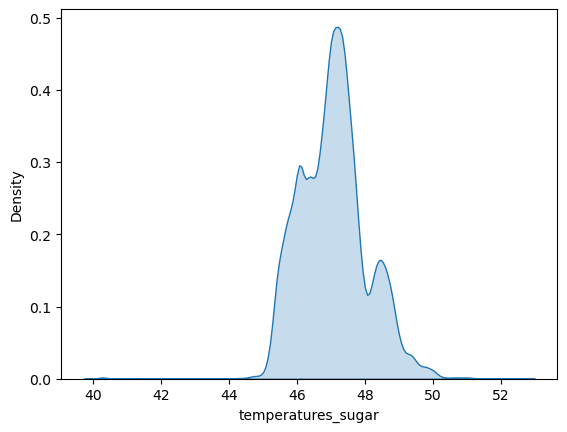

In [239]:
print(temperatures.describe())
# 绘制密度图
sns.kdeplot(temperatures, shade=True)
# 添加标题和标签
plt.xlabel('temperatures_sugar')
plt.ylabel('Density')
# 显示图形
plt.show()

In [242]:
# 对温度进行排序
sorted_temperatures = temperatures.sort_values()

# 计算 20% 和 80% 分位数
percentile_20 = sorted_temperatures.quantile(0.2)
percentile_80 = sorted_temperatures.quantile(0.8)

# 显示结果
print(f"20th percentile: {percentile_20}")
print(f"80th percentile: {percentile_80}")

# 计算 10% 和 90% 分位数
percentile_10 = sorted_temperatures.quantile(0.1)
percentile_90 = sorted_temperatures.quantile(0.9)

# 显示结果
print(f"10th percentile: {percentile_10}")
print(f"90th percentile: {percentile_90}")

# 计算 5% 和 95% 分位数
percentile_5 = sorted_temperatures.quantile(0.05)
percentile_95 = sorted_temperatures.quantile(0.95)

# 显示结果
print(f"5th percentile: {percentile_5}")
print(f"95th percentile: {percentile_95}")

20th percentile: 46.145836
80th percentile: 47.766205
10th percentile: 45.78704
90th percentile: 48.449074
5th percentile: 45.54398
95th percentile: 48.78472


sugarfree

In [243]:
# Convert the list of date strings to datetime objects
sugarfree_top_list = pd.to_datetime(sugarfree_top_list)

# Convert the datetime objects to date format
sugarfree_top_list = sugarfree_top_list.date

# Display the result
print(sugarfree_top_list)

[datetime.date(2024, 8, 27) datetime.date(2024, 9, 11)
 datetime.date(2024, 9, 13) datetime.date(2024, 8, 28)
 datetime.date(2024, 8, 29)]


In [244]:
#把这最稳定的5天的所有挤压机出口温度从低到高排列。我们找到20% percentile和80% percentile。我们认为，生成最稳的天数中，温度比较中间的区域，是较好的温度
# 使用 isin() 筛选 'Day' 列的值是否在 sugar_top_list 中
sugarfree_produce_join_df = join_result[(join_result['Sugar'] == 'Sugarfree') & 
                                    (join_result['offperiod'] == 'produce') & 
                                    (join_result['Day'].isin(sugarfree_top_list))]

# 获取挤压机出口温度列
temperatures_sugarfree = sugarfree_produce_join_df['CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp'].sort_values()
temperatures_sugarfree

696423    40.000000
517139    40.034720
204672    40.034720
517138    40.046295
129894    40.115740
            ...    
662318    53.391205
662313    53.460650
662315    53.495370
662317    53.506947
662314    53.541664
Name: CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp, Length: 161902, dtype: float64

count    161902.000000
mean         49.588338
std           1.031251
min          40.000000
25%          49.050926
50%          49.618053
75%          50.127316
max          53.541664
Name: CG_Sheeting.CG_Sheeting.Variables.rGumExtruderExitGumTemp, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7480\3359409868.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(temperatures_sugarfree, shade=True)


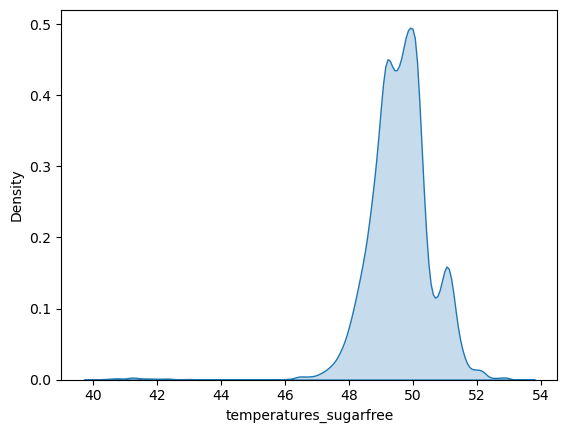

In [245]:
print(temperatures_sugarfree.describe())
# 绘制密度图
sns.kdeplot(temperatures_sugarfree, shade=True)
# 添加标题和标签
plt.xlabel('temperatures_sugarfree')
plt.ylabel('Density')
# 显示图形
plt.show()

In [246]:
# 对温度进行排序
sorted_temperatures_sugarfree = temperatures_sugarfree.sort_values()

# 计算 20% 和 80% 分位数
percentile_20 = sorted_temperatures_sugarfree.quantile(0.2)
percentile_80 = sorted_temperatures_sugarfree.quantile(0.8)

# 显示结果
print(f"20th percentile: {percentile_20}")
print(f"80th percentile: {percentile_80}")

# 计算 10% 和 90% 分位数
percentile_10 = sorted_temperatures_sugarfree.quantile(0.1)
percentile_90 = sorted_temperatures_sugarfree.quantile(0.9)

# 显示结果
print(f"10th percentile: {percentile_10}")
print(f"90th percentile: {percentile_90}")

# 计算 5% 和 95% 分位数
percentile_5 = sorted_temperatures_sugarfree.quantile(0.05)
percentile_95 = sorted_temperatures_sugarfree.quantile(0.95)

# 显示结果
print(f"5th percentile: {percentile_5}")
print(f"95th percentile: {percentile_95}")

20th percentile: 48.92361
80th percentile: 50.25463
10th percentile: 48.51852
90th percentile: 50.84491
5th percentile: 48.171295
95th percentile: 51.16898
